<a href="https://colab.research.google.com/github/anirudh2606/Car-Price-Predictor/blob/main/CarPricePredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [2]:
df = pd.read_csv('quikr.csv', encoding = 'ISO-8859-1')

In [3]:
df.head()

,name,company,year,price,kms_covered,fuel_type
0,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
1,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
2,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
3,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2015,Ask For Price,"59,000 kms",Diesel


In [4]:
df.shape

(891, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         891 non-null    object
 1   company      891 non-null    object
 2   year         891 non-null    object
 3   price        891 non-null    object
 4   kms_covered  839 non-null    object
 5   fuel_type    836 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [6]:
for i in df.columns:
  print(i, ':', df[i].nunique())

name : 525
company : 48
year : 61
price : 274
kms_covered : 258
fuel_type : 3


Lets check the quality of data


In [7]:
df['year'].unique()

array(['2006', '2018', '2014', '2015', '2012', '2013', '2016', '2010',
       '2007', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

In [8]:
df['price'].unique()

array(['4,25,000', 'Ask For Price', '3,25,000', '5,75,000', '1,75,000',
       '1,90,000', '8,30,000', '2,50,000', '1,82,000', '3,15,000',
       '4,15,000', '3,20,000', '80000', '10,00,000', '5,00,000',
       '3,50,000', '1,60,000', '3,10,000', '75000', '1,00,000',
       '2,90,000', '95000', '1,80,000', '3,85,000', '1,05,000',
       '6,50,000', '6,89,999', '4,48,000', '5,49,000', '5,01,000',
       '4,89,999', '2,80,000', '3,49,999', '2,84,999', '3,45,000',
       '4,99,999', '2,35,000', '2,49,999', '14,75,000', '3,95,000',
       '2,20,000', '1,70,000', '85000', '2,00,000', '5,70,000',
       '1,10,000', '4,48,999', '18,91,111', '1,59,500', '3,44,999',
       '4,49,999', '8,65,000', '6,99,000', '3,75,000', '2,24,999',
       '12,00,000', '1,95,000', '3,51,000', '2,40,000', '90000',
       '1,55,000', '6,00,000', '1,89,500', '2,10,000', '3,90,000',
       '1,35,000', '16,00,000', '7,01,000', '2,65,000', '5,25,000',
       '3,72,000', '6,35,000', '5,50,000', '4,85,000', '3,29,500',


In [9]:
df['kms_covered'].unique()

array(['40 kms', '22,000 kms', '28,000 kms', '36,000 kms', '59,000 kms',
       '41,000 kms', '25,000 kms', '24,530 kms', '60,000 kms',
       '30,000 kms', '32,000 kms', '48,660 kms', '45,000 kms',
       '4,000 kms', '16,934 kms', '43,000 kms', '35,550 kms',
       '39,522 kms', '39,000 kms', '55,000 kms', '72,000 kms',
       '15,975 kms', '70,000 kms', '23,452 kms', '35,522 kms',
       '48,508 kms', '15,487 kms', '82,000 kms', '20,000 kms',
       '68,000 kms', '38,000 kms', '27,000 kms', '33,000 kms',
       '46,000 kms', '16,000 kms', '47,000 kms', '35,000 kms',
       '30,874 kms', '15,000 kms', '29,685 kms', '1,30,000 kms',
       '19,000 kms', nan, '54,000 kms', '13,000 kms', '38,200 kms',
       '50,000 kms', '13,500 kms', '3,600 kms', '45,863 kms',
       '60,500 kms', '12,500 kms', '18,000 kms', '13,349 kms',
       '29,000 kms', '44,000 kms', '42,000 kms', '14,000 kms',
       '49,000 kms', '36,200 kms', '51,000 kms', '1,04,000 kms',
       '33,333 kms', '33,600 kms', '5,

In [10]:
df['fuel_type'].unique()

array(['Diesel', 'Petrol', nan, 'LPG'], dtype=object)

##Quality
- Year has many non year values
- year object to int
- Price has 1 value 'ask for price'
- price object to int
- kms_covered has null values, kms along with each value
- kms_covered object to int
- Null values in Fuel type


In [11]:
 backup = df.copy()

In [12]:
df = df[df['year'].str.isnumeric()]

In [13]:
df['year'] = df['year'].astype('int')

<ipython-input-13-961139a97e11>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['year'].astype('int')


In [14]:
df = df[df['price'] != 'Ask For Price']

In [15]:
df['price'] = df['price'].str.replace(',','')

<ipython-input-15-f7be6f0c7f0d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'].str.replace(',','')


In [16]:
df['price'] = df['price'].astype('int')

<ipython-input-16-44f0073af276>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'].astype('int')


In [17]:
df['kms_covered'] = df['kms_covered'].str.split(' ').str[0]
df['kms_covered'] = df['kms_covered'].str.replace(',', '')

<ipython-input-17-2a2609dc21e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kms_covered'] = df['kms_covered'].str.split(' ').str[0]
<ipython-input-17-2a2609dc21e9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kms_covered'] = df['kms_covered'].str.replace(',', '')


In [18]:
df[df['kms_covered'] == 'Petrol']


,name,company,year,price,kms_covered,fuel_type
889,Honda Amaze 1.2 E i VTEC,Honda,2014,180000,Petrol,NaN
890,Chevrolet Sail 1.2 LT ABS,Chevrolet,2014,160000,Petrol,NaN


In [19]:
df.loc[df['kms_covered'] == 'Petrol', "kms_covered"] = 0

In [20]:

for i in df.loc[df['kms_covered'] == 0,'year'].unique():
  median_distance = df.loc[df['year'] == i,'kms_covered'].median()
  df.loc[(df['year'] == i) & (df['kms_covered'] == 0),'kms_covered'] = median_distance

In [21]:
df['kms_covered'] = df['kms_covered'].astype('int')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 818 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         818 non-null    object
 1   company      818 non-null    object
 2   year         818 non-null    int64 
 3   price        818 non-null    int64 
 4   kms_covered  818 non-null    int64 
 5   fuel_type    815 non-null    object
dtypes: int64(3), object(3)
memory usage: 44.7+ KB


In [23]:
df = df[~df['fuel_type'].isna()]

In [24]:
a = df['name'].str.split(' ').str[:3]
df['name'] = a.apply(lambda x : " ".join(x))

<ipython-input-24-5360f1e2ccae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['name'] = a.apply(lambda x : " ".join(x))


In [25]:
df

,name,company,year,price,kms_covered,fuel_type
0,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
5,Ford Figo,Ford,2012,175000,41000,Diesel
6,Hyundai Eon,Hyundai,2013,190000,25000,Petrol
...,...,...,...,...,...,...
882,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
884,Tata Indica V2,Tata,2009,110000,30000,Diesel
885,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
887,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 815 entries, 0 to 888
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         815 non-null    object
 1   company      815 non-null    object
 2   year         815 non-null    int64 
 3   price        815 non-null    int64 
 4   kms_covered  815 non-null    int64 
 5   fuel_type    815 non-null    object
dtypes: int64(3), object(3)
memory usage: 44.6+ KB


In [27]:
df = df.reset_index(drop = True)

In [28]:
df.describe()

,year,price,kms_covered
count,815.000000,8.150000e+02,815.000000
mean,2012.451534,4.121246e+05,46277.096933
std,4.000896,4.753339e+05,34318.459638
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.925000e+05,56879.000000
max,2019.000000,8.500003e+06,400000.000000


<Axes: xlabel='price'>

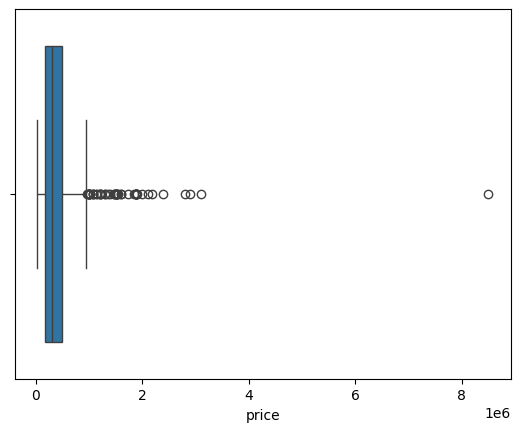

In [29]:
sns.boxplot(df['price'], orient = 'h')

lets Work on the outliers


In [30]:
p_25 = np.percentile(df['price'], 25)
p_75 = np.percentile(df['price'], 75)

In [31]:
p_25, p_75

(175000.0, 492500.0)

In [32]:
iqr = p_75 - p_25

In [33]:
upper = p_75 + 1.5 * iqr

In [34]:
upper

968750.0

In [35]:
df[df['price'] > upper]

,name,company,year,price,kms_covered,fuel_type
13,Audi A8,Audi,2017,1000000,4000,Petrol
46,Mitsubishi Pajero Sport,Mitsubishi,2015,1475000,47000,Diesel
69,Mini Cooper S,Mini,2013,1891111,13000,Petrol
75,Mini Cooper S,Mini,2013,1891111,13500,Petrol
81,Volkswagen Vento Highline,Volkswagen,2019,1200000,3600,Diesel
95,BMW 7 Series,BMW,2009,1600000,35000,Petrol
139,Mahindra Scorpio,Mahindra,2015,984999,22000,Diesel
181,Mini Cooper S,Mini,2013,1891111,13000,Petrol
219,Mitsubishi Pajero Sport,Mitsubishi,2015,1475000,47000,Diesel
221,Mercedes Benz GLA,Mercedes,2015,2000000,20000,Diesel


In [36]:
df = df[df['price'] < 6e6].reset_index(drop =True)

In [37]:
df

,name,company,year,price,kms_covered,fuel_type
0,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
1,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
2,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
3,Ford Figo,Ford,2012,175000,41000,Diesel
4,Hyundai Eon,Hyundai,2013,190000,25000,Petrol
...,...,...,...,...,...,...
809,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
810,Tata Indica V2,Tata,2009,110000,30000,Diesel
811,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
812,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [38]:
df.to_csv('cleaned_cars.csv')

In [39]:
y = df['price']

In [40]:
x = df.drop('price', axis = 1)

In [41]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

In [42]:
x_test, x_train, y_test, y_train = train_test_split(x, y, train_size = 0.2, random_state =1)

In [43]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((652, 5), (162, 5), (652,), (162,))

In [44]:
en = OneHotEncoder()
en.fit(df[['name', 'company', 'fuel_type']])
en.categories_

[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
        'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
        'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
        'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
        'Chevrolet Beat LS', 'Chevrolet Beat LT', 'Chevrolet Beat PS',
        'Chevrolet Cruze LTZ', 'Chevrolet Enjoy', 'Chevrolet Enjoy 1.4',
        'Chevrolet Sail 1.2', 'Chevrolet Sail UVA', 'Chevrolet Spark',
        'Chevrolet Spark 1.0', 'Chevrolet Spark LS', 'Chevrolet Spark LT',
        'Chevrolet Tavera LS', 'Chevrolet Tavera Neo', 'Datsun GO T',
        'Datsun Go Plus', 'Datsun Redi GO', 'Fiat Linea Emotion',
        'Fiat Petra ELX', 'Fiat Punto Emotion', 'Force Motors Force',
        'Force Motors One', 'Ford EcoSport', 'Ford EcoSport Ambiente',
        'Ford EcoSport Titanium', 'Ford EcoSport Trend',
        'Ford Endeavor 4x4', 'Ford Fiesta', 'Ford Fiesta SXi', 'Ford Figo',
        '

In [45]:
col_trans = make_column_transformer((OneHotEncoder(categories = en.categories_), ['name','company','fuel_type']), remainder = 'passthrough')

In [46]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

In [47]:
lr = LinearRegression()

In [48]:
pipe = make_pipeline(col_trans, lr)

In [49]:
model = pipe.fit(x_train, y_train)

In [50]:
y_pred = pipe.predict(x_test)

In [51]:
y_pred

array([1065487.45153783,  619663.50099439,    7094.43380579,
        578989.61785265,  365890.45697924,  307645.35711289,
        139733.09897617,  335571.94608453,  337143.91754488,
        112097.11790133,  461778.83344562,  521293.10120013,
        397776.41510747,  225604.46835089,  415954.1914023 ,
       1041200.05408553,  288876.26786444,  324859.60849462,
        624966.72776113,  229755.37183116,  451970.44206925,
        362116.28662914,  161562.0866579 ,  148015.05829681,
        289663.35228187,  611756.83241645,   71081.03333304,
        316511.41854798,  643517.53370105,   84089.18116365,
        216245.08410019,  333153.04375224,  237430.60308114,
        423048.71447114,   94835.57862522,  389068.63663882,
        296218.88628273,  592554.25725472,  159977.98258048,
        393472.69940807,  652223.79208426,   88129.43412481,
         37461.96284493,  230466.95724382,  287486.77457345,
        605382.17328052,  382402.17051233,  590267.67201414,
        650324.44973208,

In [52]:
from sklearn.metrics import r2_score

In [53]:
r2_score(y_pred, y_test)

0.7285829911970336

In [54]:
scores = []
for i in range(1000):
  x_test, x_train, y_test, y_train = train_test_split(x, y, test_size = 0.2, random_state = i)
  lr = LinearRegression()
  pipe = make_pipeline(col_trans, lr)
  pipe.fit(x_train, y_train)
  y_pred = pipe.predict(x_test)
  scores.append(r2_score(y_test, y_pred))

In [55]:
np.argmax(scores)

325

In [56]:
scores[np.argmax(scores)]

0.6510624841572039

In [61]:
x_test, x_train, y_test, y_train = train_test_split(x, y, test_size = 0.2, random_state = np.argmax(scores))
lr = LinearRegression()
pipe = make_pipeline(col_trans, lr)
pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)
r2_score(y_test, y_pred)

0.6510624841572039

In [62]:
import pickle

In [63]:
pickle.dump(pipe, open('LinearRegressionModel.pkl','wb'))

In [64]:
"""Lets Predict for new Data"""
pipe.predict(pd.DataFrame([['Maruti Suzuki Swift', 'Maruti','2019',100,'Petrol']], columns = ['name', 'company', 'year', 'kms_covered', 'fuel_type']))

array([517537.8238022])

So, for given details, the price of the car should be 517537.8238022